In [1]:
#modules
from sklearn.feature_extraction.text import TfidfVectorizer 
import pandas as pd 
from tqdm import tqdm
import os
import json
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import math
# import matplotlib.pl
# import tenserflow

from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nltk.tokenize import word_tokenize 
import re
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('stopwords')
import seaborn as sns
nltk.download('wordnet')
# from preprocess import *

#Modules
from string import punctuation
import numpy as np
from tqdm import tqdm
from afinn import Afinn
import os.path
import re
import time

#sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer


import numpy
import sys
import scipy.stats
import numpy as np
import pandas as pd
import pickle

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.util import *
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize 
from nltk.sentiment.util import mark_negation
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
nltk.download('vader_lexicon')

# from numba import jit, cuda
from gensim.models.word2vec import Word2Vec

cachedStopWords = set(stopwords.words("english"))
afinn = Afinn()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alphaq2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alphaq2/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/alphaq2/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
""" text feature extraction using VADER, lexicon, mpqa data"""
def feature_VADER(Xtext):
    # VADER
    feat_ = []
    sid = SentimentIntensityAnalyzer()
    for tweet in Xtext:
        temp = []
        flag = -1
        for sent in tweet:
            ss = sid.polarity_scores(sent)
            f = []
            for i in ss:
                f.append(ss[i])
            if(flag == -1):
                temp = f
                flag = 1
            else:
                for i in range(len(temp)):
                    temp[i] += f[i]
        feat_.append(temp)
    return np.array(feat_)

def polar_wordMPQA(X):
    #mpqa data processing
    dict1_mpqa = {}
    with open("lexicons/2. mpqa.txt", 'r') as fd:
        for line in fd:
            x = line.split("	")
            dict1_mpqa[x[0] + "_" + x[1][:-1]] = 1
    
    #bingluie processing
    dict1_bing = {}
    with open("lexicons/1. BingLiu.csv", 'r') as fd:
        for line in fd:
            x = line.split("	")
            dict1_bing[x[0] + "_" + x[1][:-1]] = 1
    
    #feature extraction
    feat_ = []
    for tokens in X:
        #mpqa
        MPQA = [0,0,0]
        for token in tokens:
            if((token + "_positive") in dict1_mpqa):
                MPQA[0] += 1
            if((token + "_negative") in dict1_mpqa):
                MPQA[1] += 1
            if((token + "_neutral") in dict1_mpqa):
                MPQA[2] += 1
        #bingliu
        BING = [0,0]
        for token in tokens:
            if((token + "_positive") in dict1_bing):
                BING[0] += 1
            if((token + "_negative") in dict1_bing):
                BING[1] += 1
            if((token + "_neutral") in dict1_bing):
                BING[2] += 1
        feat_.append(MPQA + BING)
    return np.array(feat_)

def get_word(word):
    #function to remove all numbers or # in the end
    e = len(word) - 1
    while(e != -1 and (word[e] in "0123456789" or word[e] in "#")):
        e-= 1
    return word[:e + 1]

def aggregate_score_word(X):
    #sentiment140 processing
    dict1_S140 = {}
    with open("lexicons/3. Sentiment140-Lexicon-v0.1/unigrams-pmilexicon.txt", 'r') as fd:
        for line in fd:
            x = line.split("	")
            dict1_S140[x[0] + "_positive"] = float(x[2])
            dict1_S140[x[0] + "_negative"] = float(x[3])
            
    #SENTIWORDNET processing
    dict1_WORDNET= {}
    with open("lexicons/4. SentiWordNet_3.0.0_20130122.txt", 'r') as fd:
        for line in fd:
            x = line.split("	")
            word = x[4].split(" ")
            word = list(map(get_word,word))
            words = ""
            for i,e in enumerate(word):
                if(i == 0):
                    words += e
                else:
                    words += " " + e
            dict1_WORDNET[words + "_positive"] = float(x[2])
            dict1_WORDNET[words + "_negative"] = float(x[3])
    
    #feature extraction        
    feat_ = []
    for tokens in X:
        sent140 = [0,0]
        wordnet = [0,0]
        afin = [0,0]
        cnt = 0
        for token in tokens:
            if("#" not in token):
                cnt += 1
                #sent140
                if((token + "_positive") in dict1_S140):
                    sent140[0] += dict1_S140[token + "_positive"]
                if((token + "_negative") in dict1_S140):
                    sent140[1] += dict1_S140[token + "_negative"]
                #wordnet
                if((token + "_positive") in dict1_WORDNET):
                    wordnet[0] += dict1_WORDNET[token + "_positive"]
                if((token + "_negative") in dict1_WORDNET):
                    wordnet[1] += dict1_WORDNET[token + "_negative"]
                #afinn
                e = afinn.score(token)
                if(e > 0):
                    afin[0] += e
                else:
                    afin[1] += abs(e)
        res = sent140 + wordnet + afin
        feat_.append([i/(cnt + (cnt == 0)) for i in res])
    return np.array(feat_)
                    
emotions = set([])
def aggregate_hashtag_scores(X):
    #NRC hashtag processing
    dict1_NRC = {}
    with open("lexicons/7. NRC-Hashtag-Sentiment-Lexicon-v0.1/unigrams-pmilexicon.txt", 'r') as fd:
        for line in fd:
            x = line.split("	")
            dict1_NRC[x[0] + "_positive"] = float(x[2])
            dict1_NRC[x[0] + "_negative"] = float(x[3])
    
    #feature extraction
    feat_ = []
    for tokens in X:
        cnt = 0
        f = [0,0]
        for token in tokens:
            if("#" not in token):
                continue
            cnt += 1
            if((token + "_positive") in dict1_NRC):
                f[0] += dict1_NRC[token + "_positive"]
            if((token + "_negative") in dict1_NRC):
                f[1] += dict1_NRC[token + "_negative"]
        feat_.append([i/(cnt + (i == 0)) for i in f])
    return np.array(feat_)
def emotion_word_count(X):
    #NRC emotion preprocessing
    dict1_NRC = {}
    with open("lexicons/8. NRC-word-emotion-lexicon.txt", 'r') as fd:
        for line in fd:
            x = line.split("	")
            dict1_NRC[x[0] + "_" + x[1]] = int(x[2])
            emotions.add(x[1])
    #feature extraction
    feat_ = []
    for e,tokens in tqdm(enumerate(X)):
        emo_count = [0 for i in range(len(emotions))]
        for token in tokens:
            cnt = 0
            for i in emotions:
                if((token + "_" + i) in dict1_NRC):
                    emo_count[cnt] += dict1_NRC[token + "_" + i]
                cnt += 1
        feat_.append(emo_count)
    return np.array(feat_)

def emotion_word_score(X):
    #NRC emotion preprocessing
    dict1_NRC = {}
    cnt_r = 0
    len1 = 0;
    with open("lexicons/6. NRC-10-expanded.csv", 'r') as fd:
        for line in fd:
            if(cnt_r == 0):
                cnt_r += 1
                continue;
            x = line.split("	")
            dict1_NRC[x[0]] = [float(i) for i in x[1:]]
            len1 = len(x[1:])
    
    #feature extraction
    feat_ = []
    for e,tokens in tqdm(enumerate(X)):
        emo_score = [0 for i in range(len1)]
        cnt = 0
        for token in tokens:
            if("#" in token):
                continue
            cnt += 1
            if(token in dict1_NRC):
                for i,val in enumerate(dict1_NRC[token]):
                    emo_score[i] += val
        feat_.append([i/(cnt + (cnt == 0)) for i in emo_score])
    return np.array(feat_)

def emotion_hashtag_score(X):
    #NRC emotion processing
    dict1_NRC = {}
    with open("lexicons/5. NRC-Hashtag-Emotion-Lexicon-v0.2.txt", 'r') as fd:
        for line in fd:
            x = line.split("	")
            dict1_NRC[x[1] + "_" + x[0]] = float(x[2])

    #feature extraction
    feat_ = []
    for e,tokens in tqdm(enumerate(X)):
        p = 0
        emo_score = [0 for i in range(len(emotions))]
        for token in tokens:
            if("#" not in token):
                continue
            p += 1
            cnt = 0
            for i in emotions:
                if((token + "_" + i) in dict1_NRC):
                    emo_score[cnt] += dict1_NRC[token + "_" + i]
                cnt += 1
        feat_.append([i/(p + (i == 0)) for i in emo_score])
    return np.array(feat_)

def emoticon_score(X):
    #afin emotion processing 
    dict1_afin = {}
    with open("lexicons/9. AFINN-emoticon-8.txt", 'r') as fd:
        for line in fd:
            x = line.split("	")
            if(float(x[1]) >= 0):
                dict1_afin[x[0] + "_positive"] = (float(x[1]))
                dict1_afin[x[0] + "_negative"] = 0
            else:
                dict1_afin[x[0] + "_positive"] = 0
                dict1_afin[x[0] + "_negative"] = abs(float(x[1]))
                
    #feature extraction
    feat_ = []
    for tokens in X:
        f = [0,0]
        for token in tokens:
            if((token + "_negative") in dict1_afin):
                f[0] += dict1_afin[token + "_negative"]
            if((token + "_positive") in dict1_afin):
                f[1] += dict1_afin[token + "_positive"]
        feat_.append(f)
    return np.array(feat_)
def count_neg_words(X):
    #feature extraction
    feat_ = []
    for tokens in X:
        f = [0]
        p = mark_negation(tokens)
        for i in p:
            if("_NEG" in i):
                f[0] += 1
        feat_.append(f)
    return np.array(feat_)

def word_2_vec(X):
    #word2vec feature extraction
    model = Word2Vec(X, min_count = 0)
    feat_ = []
#     print(X)
    for tokens in X:
        f = [-1,-1,-1]
        flag = -1
        
        for token in tokens:
            if(flag == -1):
                flag = 0
                f[0] = model[token]
                f[1] = model[token]
                f[2] = model[token]
            else:
                f[0] = np.add(model[token],f[0]) #average
                f[1] = np.maximum(f[1],model[token]) #maximum
                f[2] = np.minimum(f[2],model[token]) #minimum
        
        if(flag == -1):
            f[0] = model['I']
            f[1] = model['I']
            f[2] = model['I']
            
        f[0] = np.divide(f[0],len(tokens))
        res = []
        for i in f:
            for j in range(i.shape[0]):
                res.append(i[j])
        feat_.append(res)
    return np.array(feat_)
def doc_2_vec(Xtext):
    #doc2vec feature extraction
    cnt = 0;
    documents = []
    for i in Xtext:
        for j,doc in enumerate(i):
            documents.append(TaggedDocument(doc,[cnt]))
            cnt += 1
            
    model = Doc2Vec(documents)

    feat_ = []
    for sent in Xtext:
        f = [-1]

        f = model.infer_vector(sent)

        feat_.append(f)
    return np.array(feat_)

#funciton to process sentences
def preprocess(tweet):
    tweet = word_tokenize(tweet)
    sent = ' '.join([words for words in tweet if words not in cachedStopWords])
    return sent

#unigram construction
def unigram(tweetsarr, tweetTokenized):
    #combining all tokens
    n = len(tweetsarr)
    tokensCombined = []
    for i, tokens in enumerate(tweetTokenized):
        tokensCombined.extend(tokens)

    #get freqdistribution
    analysis = nltk.FreqDist(tokensCombined)

    del tokensCombined
    #mapping construction
    frequencyDict = dict([(m, n) for m, n in analysis.items() if n > 35])
    lenfrequencyDict = len(frequencyDict)
    wordIndex = {}
    for i, key in enumerate(frequencyDict.keys()):
        wordIndex[key] = i
    
    frequencyDict.clear()
#     print(lenfrequencyDict)

    #feature extraction
    featureVector1 = np.zeros([n, lenfrequencyDict])
    for i, tokens in enumerate(tweetTokenized):
        arr = np.zeros([lenfrequencyDict])
        for token in tokens:
            if token in wordIndex:
                arr[wordIndex[token]] = 1
        featureVector1[i] = arr

    return featureVector1

#bigram construction
def bigram(tweetsarr):
    #combining all bigrams
    n = len(tweetsarr)
    bigraminTweet = []
    allbigrams = []
    for tweet in tweetsarr:
        bigrams = []
        for i in range(1,len(tweet)):
            bigrams.append(tweet[i-1] + " " + tweet[i])
        bigraminTweet.append(bigrams)
        allbigrams.extend(bigrams)

    #get freqdistribution
    analysis = nltk.FreqDist(allbigrams)
    del allbigrams
    frequencybigramDict = dict([(m, n) for m, n in analysis.items() if n > 25])
    lenfrequencybigramDict = len(frequencybigramDict)

    bigramIndexDict = {}
    for i, key in enumerate(frequencybigramDict.keys()):
        bigramIndexDict[key] = i
    frequencybigramDict.clear()

    #feature extraction
    featureVector2 = np.zeros([n, lenfrequencybigramDict])
    for i, bigramTweet in enumerate(bigraminTweet):
        arr = np.zeros([lenfrequencybigramDict])
        for bigram in bigramTweet:
            if bigram in bigramIndexDict:
                arr[bigramIndexDict[bigram]] = 1
        featureVector2[i] = arr
    del bigraminTweet

    return featureVector2
def tfidf_feat(Xtext):
    total_txt = []
    for sents in Xtext:
        temp = ""
        for sent in sents:
            temp += sent + " "
        total_txt.append(temp)
#     print(total_txt[:10])
    tfidf = TfidfVectorizer(min_df = 25, max_df = 0.7, ngram_range = (1, 2)) 
    features = tfidf.fit_transform(total_txt)
#     print(features.toarray())
    return features.toarray()
def feature_extraction(Xtext,X):
    word_vec = doc_2_vec(X)#10
    VADER = feature_VADER(Xtext) #1
    polar = polar_wordMPQA(X) #2
    agg_word_score = aggregate_score_word(X) #3
    agg_hash_score = aggregate_hashtag_scores(X) #4
    emot_word = emotion_word_count(X) #5
    emot_word_score = emotion_word_score(X) #6
    emote_hash_score = emotion_hashtag_score(X) #7
    emoticon = emoticon_score(X)#8
    neg_words = count_neg_words(X)#9
    uni = unigram(Xtext,X) #unigram feature extraction
    pca = PCA(n_components=0.9)
    print(uni.shape)
    bi = bigram(X) #bigram feature extraction
    print(bi.shape)
    
    a = len(Xtext)
    b = word_vec.shape[1] + uni.shape[1] + bi.shape[1] + VADER.shape[1] + polar.shape[1] + agg_word_score.shape[1] + agg_hash_score.shape[1] + emot_word.shape[1] + emot_word_score.shape[1] + emote_hash_score.shape[1] + emoticon.shape[1] + neg_words.shape[1]
    
     #feature combination
    feature = np.zeros([a, b])
    for i in range(len(Xtext)):
        feature[i] = np.concatenate((word_vec[i],bi[i],uni[i],VADER[i],polar[i],agg_word_score[i],agg_hash_score[i],emot_word[i],emot_word_score[i],emote_hash_score[i],emoticon[i],neg_words[i]))
    print(feature.shape)
    
    return feature

def feature_extraction_rem_n(Xtext,X):
    word_vec = doc_2_vec(X)#10
    VADER = feature_VADER(Xtext) #1
    polar = polar_wordMPQA(X) #2
    agg_word_score = aggregate_score_word(X) #3
    agg_hash_score = aggregate_hashtag_scores(X) #4
    emot_word = emotion_word_count(X) #5
    emot_word_score = emotion_word_score(X) #6
    emote_hash_score = emotion_hashtag_score(X) #7
    emoticon = emoticon_score(X)#8
    neg_words = count_neg_words(X)#9
    
    a = len(Xtext)
    b = word_vec.shape[1]  + VADER.shape[1] + polar.shape[1] + agg_word_score.shape[1] + agg_hash_score.shape[1] + emot_word.shape[1] + emot_word_score.shape[1] + emote_hash_score.shape[1] + emoticon.shape[1] + neg_words.shape[1]
    
     #feature combination
    feature = np.zeros([a, b])
    for i in range(len(Xtext)):
        feature[i] = np.concatenate((word_vec[i],VADER[i],polar[i],agg_word_score[i],agg_hash_score[i],emot_word[i],emot_word_score[i],emote_hash_score[i],emoticon[i],neg_words[i]))
    print(feature.shape)
    
    return feature
def feature_extraction_tfidf(Xtext,X):
    tfidf1 = np.array(tfidf_feat(Xtext))
#     print(tfidf1.shape,"10231231")
    VADER = feature_VADER(Xtext) #1
    polar = polar_wordMPQA(X) #2
    agg_word_score = aggregate_score_word(X) #3
    agg_hash_score = aggregate_hashtag_scores(X) #4
    emot_word = emotion_word_count(X) #5
    emot_word_score = emotion_word_score(X) #6
    emote_hash_score = emotion_hashtag_score(X) #7
    emoticon = emoticon_score(X)#8
    neg_words = count_neg_words(X)#9
    print("done")
    word_vec = doc_2_vec(X)#10

    
    a = len(Xtext)
    b = tfidf1.shape[1] + word_vec.shape[1]  + VADER.shape[1] + polar.shape[1] + agg_word_score.shape[1] + agg_hash_score.shape[1] + emot_word.shape[1] + emot_word_score.shape[1] + emote_hash_score.shape[1] + emoticon.shape[1] + neg_words.shape[1]
    
     #feature combination
    feature = np.zeros([a, b])
    for i in range(len(Xtext)):
        feature[i] = np.concatenate((tfidf1[i],word_vec[i],VADER[i],polar[i],agg_word_score[i],agg_hash_score[i],emot_word[i],emot_word_score[i],emote_hash_score[i],emoticon[i],neg_words[i]))
    print(feature.shape)
    
    return feature


In [3]:
from sklearn.linear_model import LogisticRegression


def get_json(path):
    try:
        with open(path,"r",encoding='utf-8') as f:
            json_file = json.load(f)
    except:
        return None
    return json_file



In [4]:
train = pd.read_csv("train/train.csv")
test = pd.read_csv("test/test.csv")
lemmatizer = WordNetLemmatizer() 

In [5]:
train_pet_ids = train.PetID.unique()
test_pet_ids = test.PetID.unique()
stop_words = set(stopwords.words('english'))
print(train_pet_ids)

['86e1089a3' '6296e909a' '3422e4906' ... 'd981b6395' 'e4da1c9e4'
 'a83d95ead']


In [6]:
train_text = []
train_offsets = [] #notes range of each petid
train_sentiment = []
text_g = ""
for id in train_pet_ids:
    js = get_json("train_sentiment/" + id + ".json")
    if(js == None):
        text_g += " Nan"
        train_text.append("Nan")
        train_offsets.append(1)
        train_sentiment.append({'magnitude': 0.0, 'score': 0.0})
        continue
    count = 0;
    l = []
    f = {"magnitude": 0, 'score' : 0}
    for sent in js['sentences']:
        t = ""
        
        tokens = word_tokenize(sent['text']['content'])
        for j in tokens:
            if(re.match("[A-Za-z]+",j) and j not in stop_words):
                t += " " + lemmatizer.lemmatize(j)
        l.append(t)

        text_g += " " + t
        count += 1
        f["magnitude"] += sent['sentiment']['magnitude']
        f["score"] += sent['sentiment']['score']
        
    train_text.append(l)
    train_sentiment.append(f)
    train_offsets.append(count)
print(train_text[:10])
print(train_sentiment[:10])
#train_data

[[' Nibble month old ball cuteness', ' He energetic playful', ' I rescued couple cat month ago could get neutered time clinic fully scheduled', ' The result little kitty', ' I enough space fund care cat household', ' Looking responsible people take Nibble care'], [' I found alone yesterday near apartment', ' It shaking I bring home provide temporary care'], [' Their pregnant mother dumped irresponsible owner roadside near shop Subang Jaya', ' Gave birth roadside', ' They healthy adorable puppy', ' Already dewormed vaccinated ready go home', ' No tying caging long hour guard dog', ' However acceptable cage tie precautionary purpose', ' Interested adopt pls call'], [' Good guard dog alert active obedience waiting good master plz call sm detail really get interested thanks'], [' This handsome yet cute boy adoption', ' He playful pal seen puppy', ' He love nibble shoelace Chase young age', ' Imagine cute brat grows', ' We looking loving home Hunter one take care give love need', ' Please c

In [7]:
len1 = []
test_offsets = [] #notes range of each petid
test_sentiment = []
test_text = []

for id in test_pet_ids:
    js = get_json("test_sentiment/" + id + ".json")
    if(js == None):
        text_g += " Nan"
        test_text.append("Nan")
        test_offsets.append(1)
        test_sentiment.append({'magnitude': 0.0, 'score': 0.0})
        continue
    count = 0;
    l = []
    f = {"magnitude": 0, 'score' : 0}
    for sent in js['sentences']:
        t = ""
        
        tokens = word_tokenize(sent['text']['content'])
        for j in tokens:
            if(re.match("[A-Za-z]+",j) and j not in stop_words):
                t += " " + lemmatizer.lemmatize(j)
        l.append(t)

        text_g += " " + t
        count += 1
        f["magnitude"] += sent['sentiment']['magnitude']
        f["score"] += sent['sentiment']['score']
        
    test_text.append(l)
    test_sentiment.append(f)
    test_offsets.append(count)

print(test_text[:10])
print(test_sentiment[:10])    
#test_data

[[' Dopey Age old Male One half pair Dopey reserved one compared brother Grey', ' However love petted active nature', ' Loves chase ball play anything mobile', ' Favourite hobby Watching TV near TV screen', ' Grey Age old Male The wonder twin Grey Dopey brotherly protects', ' Grey dominant Dopey elder one playful', ' Favourite hobby Loves sit door look outside'], [' Please note Chichi neutered therefore breed', ' ChiChi Persian difference She silent cat', ' She love petted need regular grooming cleaning', ' She defective tearduct right eye requires daily cleaning', ' She neutered go vaccinated routine regularly', ' Favourite hobby Loves roam enjoys outside scenery', ' Please email interested comment harder keep track'], [' Sticky named tendency stick cuddle found two sibling campus', ' These cuties looking nice home', ' The adoption fee deposit hold onto kitty neutered', ' Alternatively could let u use deposit contact help carry sterilization vet time', ' We looking cat loving friendly

In [8]:
total_text = train_text[:] + test_text[:]
print(len(train_text))

#lemmatizing all words to get a common root word.
total_token = []
for ind,i in tqdm(enumerate(total_text)):
    temp = []
    for sent in i:
        e = word_tokenize(sent)
        for word in e:
            temp.append(lemmatizer.lemmatize(word))
    total_token.append(temp)


75it [00:00, 726.71it/s]

14993


18965it [00:13, 1418.61it/s]


In [9]:
#feature extraction
print(tfidf_feat(total_text).shape)

(18965, 4727)


In [ ]:
feat_ = feature_extraction(total_text,total_token)
np.save("test_features.npy",feat_)
#features with ngram

In [ ]:
feat_ = feature_extraction_rem_n(total_text,total_token)
np.save("test_features_without_ngram.npy",feat_)
print(feat_.shape)
#features without ngram

In [53]:
feat_ = feature_extraction_tfidf(total_text,total_token)
np.save("test_features_with_tfidf-ngram.npy",feat_)
print(feat_.shape)
#features with tfidf and ngram

(18965, 4727) 10231231


18965it [00:04, 4509.99it/s]
18965it [00:00, 29680.34it/s]
18965it [00:00, 129165.63it/s]


done


(18965, 4877)
(18965, 4877)


In [10]:
feat_ = np.load("test_features.npy")
print(feat_.shape)
#test features

(18965, 4446)


In [11]:
feat_without_ngram = np.load("test_features_without_ngram.npy")
print(feat_without_ngram.shape)
#test features without ngram

(18965, 150)


In [12]:
feat_with_tfidf = np.load("test_features_with_tfidf-ngram.npy")
print(feat_with_tfidf.shape)
#test features with tfidf and ngram

(18965, 4877)


In [13]:
#functions to train and test different models 
def svmModel(X, Y,Xtest,Ytest):
    SVM = svm.SVC()
    SVM.fit(X, Y)
    prediction = SVM.predict(Xtest)
    print("Svm accuracy ", accuracy_score(prediction, Ytest))
    print("Svm QWK ", quadratic_weighted_kappa(prediction, Ytest))
    return prediction,Ytest
def decisionTreeModel(X, Y,Xtest,Ytest):
    dt = DecisionTreeClassifier()
    dt.fit(X, Y)
    prediction = dt.predict(Xtest)
    print("DT accuracy ",  accuracy_score(prediction, Ytest))
    return prediction,Ytest
def mlpModel(X, Y,Xtest,Ytest):
#     print("MLP Model Start")
    classifier = MLPClassifier()
    # classifier = MLPClassifier(random_state=1, max_iter=300)
    classifier.fit(X, Y)
    prediction = classifier.predict(Xtest)
    print("MLP accuracy ",  accuracy_score(prediction, Ytest))
    return prediction,Ytest
def RandomForest(X,Y,Xtest,Ytest):
    classifier = RandomForestClassifier()
    classifier.fit(X, Y)
    prediction = classifier.predict(Xtest)
    print("Randomforest accuracy ",  accuracy_score(prediction, Ytest))
    return prediction,Ytest
def linearSVC(X,Y,Xtest,Ytest):
    classifier = LinearSVC(random_state=0, tol=1e-5,max_iter = 10000)
    classifier.fit(X, Y)
    prediction = classifier.predict(Xtest)
    print("Linear SVC accuracy ",  accuracy_score(prediction, Ytest))
    return prediction,Ytest
def KNN(X,Y,Xtest,Ytest):
    classifier = KNeighborsClassifier(random_state=0, tol=1e-5,max_iter = 10000)
    classifier.fit(X, Y)
    prediction = classifier.predict(Xtest)
    print("KNN accuracy ",  accuracy_score(prediction, Ytest))
    return prediction,Ytest
def Kmeans(X,Y,Xtest,Ytest):
    classifier = KMeans(n_clusters=2, random_state=0).fit(X)
    prediction = classifier.predict(Xtest)
    print("KMeans accuracy ",  accuracy_score(prediction, Ytest))
    return prediction,Ytest
def Adaboost(X,Y,Xtest,Ytest):
    classifier = AdaBoostClassifier()
    classifier.fit(X, Y)
    prediction = classifier.predict(Xtest)
    print("Adaboost accuracy ",  accuracy_score(prediction, Ytest))
    return prediction,Ytest
def xgboost(X,Y,Xtest,Ytest):
    classifier = GradientBoostingClassifier()
    classifier.fit(X, Y)
    prediction = classifier.predict(Xtest)
    print("XGBoost accuracy ",  accuracy_score(prediction, Ytest))
    return prediction,Ytest
def logistic(X,Y,Xtest,Ytest):
    classifier = LogisticRegression(max_iter = 20000)
    classifier.fit(X, Y)
    prediction = classifier.predict(Xtest)
    print("logistic accuracy ",  accuracy_score(prediction, Ytest))
    return prediction,Ytest
def test_models(X,Y,Xtest,Ytest):
    decisionTreeModel(X,Y,Xtest,Ytest)
    RandomForest(X,Y,Xtest,Ytest)
    linearSVC(X,Y,Xtest,Ytest)
    Adaboost(X,Y,Xtest,Ytest)
    xgboost(X,Y,Xtest,Ytest)
    logistic(X,Y,Xtest,Ytest)
    svmModel(X,Y,Xtest,Ytest)
    mlpModel(X,Y,Xtest,Ytest)

In [20]:
test_features = feat_with_tfidf[len(train_text):]
train_features = feat_with_tfidf[:len(train_text)]

In [15]:

#only text-tidf features
test_features = feat_with_tfidf[len(train_text):]
train_features = feat_with_tfidf[:len(train_text)]
y_train = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train = np.array(y_train["AdoptionSpeed"])

x_train, x_test, y_train, y_test = train_test_split(train_features, y_train, test_size=0.25, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print("testing")
linearSVC(x_train,y_train,x_test,y_test)

testing
Linear SVC accuracy  0.32408642304614566


(array([1, 3, 1, ..., 4, 2, 1]), array([4, 4, 4, ..., 1, 4, 4]))

In [ ]:
#using All modolaties features features
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
csv_x = np.load("train/train_csv/train_X.npy")
csv_y = np.load("train/train_csv/train_Y.npy")
y_train1 = np.array(y_train1["AdoptionSpeed"])

img_x = pd.read_csv("train_img_features_VGG16.csv")
img_x = img_x.drop(["AdoptionSpeed"],axis = 1)
# print(img_x.head())
img_x = img_x.to_numpy()[:, 1:]
pca = PCA(n_components = 0.95)
test_features = feat_with_tfidf[len(train_text):]
train_features = feat_with_tfidf[:len(train_text)]
y_train = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train = np.array(y_train["AdoptionSpeed"])

elite_x = np.concatenate((csv_x,train_features,img_x),axis = 1)
elite_x = pca.fit_transform(elite_x)
x_train, x_test, y_train, y_test = train_test_split(elite_x, y_train1, test_size=0.25, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print("testing")
test_models(x_train,y_train,x_test,y_test)

In [16]:
test_features = feat_without_ngram[len(train_text):]
train_features = feat_without_ngram[:len(train_text)]

In [17]:
#text features without ngram
test_features = feat_without_ngram[len(train_text):]
train_features = feat_without_ngram[:len(train_text)]
# train_features = pca.fit_transform(train_features)
y_train = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train = np.array(y_train["AdoptionSpeed"])

x_train, x_test, y_train, y_test = train_test_split(train_features, y_train, test_size=0.25, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print("testing")
linearSVC(x_train,y_train,x_test,y_test)

testing
Linear SVC accuracy  0.2816751133635636


(array([4, 4, 4, ..., 4, 4, 4]), array([4, 4, 4, ..., 1, 4, 4]))

In [2]:
#using all the modalities
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
csv_x = np.load("train/train_csv/train_X.npy")
csv_y = np.load("train/train_csv/train_Y.npy")
y_train1 = np.array(y_train1["AdoptionSpeed"])

img_x = pd.read_csv("train_img_features_VGG16.csv")
img_x = img_x.drop(["AdoptionSpeed"],axis = 1)

img_x = img_x.to_numpy()[:, 1:]
pca = PCA(n_components = 0.95)
test_features = feat_without_ngram[len(train_text):]
train_features = feat_without_ngram[:len(train_text)]
y_train = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train = np.array(y_train["AdoptionSpeed"])

elite_x = np.concatenate((csv_x,train_features,img_x),axis = 1)
elite_x = pca.fit_transform(elite_x)
x_train, x_test, y_train, y_test = train_test_split(elite_x, y_train1, test_size=0.25, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print("testing")
test_models(x_train,y_train,x_test,y_test)

NameError: name 'pd' is not defined

In [13]:
test_features = feat_[len(train_text):]
train_features = feat_[:len(train_text)]

In [19]:
#using features with ngram
test_features = feat_[len(train_text):]
train_features = feat_[:len(train_text)]

y_train = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train = np.array(y_train["AdoptionSpeed"])

x_train, x_test, y_train, y_test = train_test_split(train_features, y_train, test_size=0.25, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print("testing")
linearSVC(x_train,y_train,x_test,y_test)

testing
Linear SVC accuracy  0.3350226727127234


(array([2, 3, 4, ..., 2, 1, 4]), array([4, 4, 4, ..., 1, 4, 4]))

In [ ]:
#using all the modalities with text - ngram
csv_x = np.load("train/train_csv/train_X.npy")
csv_y = np.load("train/train_csv/train_Y.npy")
y_train1 = np.array(y_train1["AdoptionSpeed"])

img_x = pd.read_csv("train_img_features_VGG16.csv")
img_x = img_x.drop(["AdoptionSpeed"],axis = 1)
# print(img_x.head())
img_x = img_x.to_numpy()[:, 1:]
pca = PCA(n_components = 0.95)
test_features = feat_[len(train_text):]
train_features = feat_[:len(train_text)]
y_train = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train = np.array(y_train["AdoptionSpeed"])
train_features = pca.fit_transform(train_features)
elite_x = np.concatenate((csv_x,train_features,img_x),axis = 1)

x_train, x_test, y_train, y_test = train_test_split(elite_x, y_train1, test_size=0.25, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print(x_train.shape)
print("testing")
test_models(x_train,y_train,x_test,y_test)

In [21]:
#using all the modalities with text - ngram wiht pca
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
csv_x = np.load("train/train_csv/train_X.npy")
csv_y = np.load("train/train_csv/train_Y.npy")
y_train1 = np.array(y_train1["AdoptionSpeed"])

img_x = pd.read_csv("train_img_features_VGG16.csv")
img_x = img_x.drop(["AdoptionSpeed"],axis = 1)
# print(img_x.head())
img_x = img_x.to_numpy()[:, 1:]
pca = PCA(n_components = 0.97)
test_features = feat_[len(train_text):]
train_features = feat_[:len(train_text)]
y_train = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train = np.array(y_train["AdoptionSpeed"])
elite_x = pca.fit_transform(np.concatenate((csv_x,train_features),axis = 1))
elite_x = np.concatenate((elite_x,img_x),axis = 1)
x_train, x_test, y_train, y_test = train_test_split(elite_x, y_train1, test_size=0.25, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print(x_train.shape)
print("testing")
test_models(x_train,y_train,x_test,y_test)

(11244, 129)
testing
DT accuracy  0.2646038943718325
Randomforest accuracy  0.33182181915177383


/home/alphaq2/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC accuracy  0.3352894105094692
Adaboost accuracy  0.3102160576153641
XGBoost accuracy  0.3283542277940784
logistic accuracy  0.34035742864763935
Svm accuracy  0.34702587356628434
MLP accuracy  0.2867431315017338


/home/alphaq2/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#using all the modalities with text - ngram pca
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
csv_x = np.load("train/train_csv/train_X.npy")
csv_y = np.load("train/train_csv/train_Y.npy")
y_train1 = np.array(y_train1["AdoptionSpeed"])

img_x = pd.read_csv("train_img_features_VGG16.csv")
img_x = img_x.drop(["AdoptionSpeed"],axis = 1)
# print(img_x.head())
img_x = img_x.to_numpy()[:, 1:]
pca = PCA(n_components = 0.99)
test_features = feat_[len(train_text):]
train_features = feat_[:len(train_text)]
y_train = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train = np.array(y_train["AdoptionSpeed"])
elite_x = pca.fit_transform(np.concatenate((csv_x,train_features),axis = 1))
elite_x = np.concatenate((elite_x,img_x),axis = 1)
x_train, x_test, y_train, y_test = train_test_split(elite_x, y_train1, test_size=0.25, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print(x_train.shape)
print("testing")
test_models(x_train,y_train,x_test,y_test)

(11244, 129)
testing
DT accuracy  0.2547345958922379
Randomforest accuracy  0.3371565750866898


In [ ]:
#using all the modalities with text - ngram pca
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
csv_x = np.load("train/train_csv/train_X.npy")
csv_y = np.load("train/train_csv/train_Y.npy")
y_train1 = np.array(y_train1["AdoptionSpeed"])

img_x = pd.read_csv("train_img_features_VGG16.csv")
img_x = img_x.drop(["AdoptionSpeed"],axis = 1)
# print(img_x.head())
img_x = img_x.to_numpy()[:, 1:]
test_features = feat_[len(train_text):]
train_features = feat_[:len(train_text)]
y_train = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train = np.array(y_train["AdoptionSpeed"])
elite_x = np.concatenate((img_x,csv_x,train_features),axis = 1)
x_train, x_test, y_train, y_test = train_test_split(elite_x, y_train1, test_size=0.25, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print(x_train.shape)
print("testing")
test_models(x_train,y_train,x_test,y_test)

(11244, 4918)
testing
DT accuracy  0.279807948786343
Randomforest accuracy  0.34702587356628434


In [16]:
#using all the modalities with text - ngram 
svmModel(x_train,y_train,x_test,y_test)
decisionTreeModel(x_train,y_train,x_test,y_test)
mlpModel(x_train,y_train,x_test,y_test)


Svm accuracy  0.36863163510269403
DT accuracy  0.2534009069085089
MLP accuracy  0.3590290744198453


(array([2, 2, 1, ..., 4, 1, 4]), array([4, 4, 4, ..., 1, 4, 4]))

In [18]:
#using all the modalities with text
y_train = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
# print(y_train)
y_train = np.array(y_train["AdoptionSpeed"])
x_train, x_test, y_train, y_test = train_test_split(train_features, y_train, test_size=0.25, random_state=0)
svmModel(x_train,y_train,x_test,y_test)
decisionTreeModel(x_train,y_train,x_test,y_test)
mlpModel(x_train,y_train,x_test,y_test)

Svm accuracy  0.29634569218458257
DT accuracy  0.29154441184315816
MLP accuracy  0.3147506001600427


(array([3, 3, 4, ..., 4, 3, 3]), array([4, 4, 4, ..., 1, 4, 4]))

In [19]:
# acc = accuracy_score(y_test, y_pred)
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
# print(acc)

In [14]:
#using all the modalities with text - ngram
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
csv_x = np.load("train/train_csv/train_X.npy")
csv_y = np.load("train/train_csv/train_Y.npy")
y_train1 = np.array(y_train1["AdoptionSpeed"])

img_x = pd.read_csv("train_img_features_VGG16.csv")
img_x = img_x.drop(["AdoptionSpeed"],axis = 1)
# print(img_x.head())
img_x = img_x.to_numpy()[:, 1:]
elite_x = np.concatenate((train_features,img_x,csv_x),axis = 1)
# elite_x = train_data
print(elite_x.shape)
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train1 = np.array(y_train1["AdoptionSpeed"])

(14993, 4918)


100%|██████████| 14993/14993 [09:16<00:00, 26.92it/s]


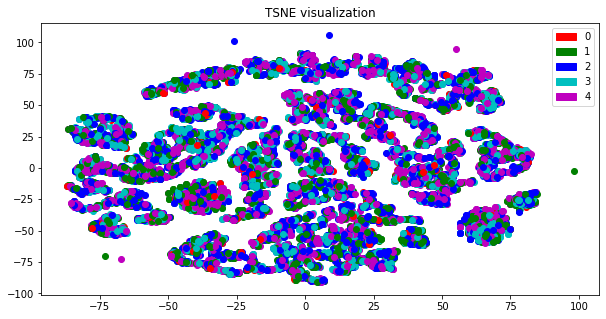

In [18]:
#TSNE plot
from sklearn.manifold import TSNE
import h5py
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt  
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
tsne = TSNE(n_components=2 ,random_state=0)
X_2d = tsne.fit_transform(elite_x)

#plotting all classes
plt.figure(figsize=(10, 5))
colors = ['r', 'g', 'b', 'c', 'm']
handles_1 = []
for i in range(5):
    handles_1.append(mpatches.Patch(color = colors[i],label = str(i)))
for i in tqdm(range(X_2d.shape[0])):
    plt.scatter(X_2d[i][0],X_2d[i][1], c=colors[int(y_train1[i])])
plt.legend(handles = handles_1)
plt.title("TSNE visualization")
plt.show()

In [7]:

#stratified sampling
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(elite_x, y_train1):
    x_train, x_test = elite_x[train_index], elite_x[test_index]
    y_train, y_test = y_train1[train_index], y_train1[test_index]
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
svmModel(x_train,y_train,x_test,y_test)
decisionTreeModel(x_train,y_train,x_test,y_test)
mlpModel(x_train,y_train,x_test,y_test)

1231231


NameError: name 'elite_x' is not defined

In [ ]:
#stratified sampling
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(elite_x, y_train1):
    x_train, x_test = elite_x[train_index], elite_x[test_index]
    y_train, y_test = y_train1[train_index], y_train1[test_index]
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
svmModel(C = 0.7,x_train,y_train,x_test,y_test)

In [ ]:
elite_x = np.concatenate((train_features,img_x,csv_x),axis = 1)
#running all the models

print(elite_x.shape)
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train1 = np.array(y_train1["AdoptionSpeed"])
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(elite_x, y_train1):
    x_train, x_test = elite_x[train_index], elite_x[test_index]
    y_train, y_test = y_train1[train_index], y_train1[test_index]
RandomForest(x_train,y_train,x_test,y_test)
DecisionTree(x_train,y_train,x_test,y_test)

In [ ]:
elite_x = np.concatenate((train_features,csv_x),axis = 1)
#running all the models

print(elite_x.shape)
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train1 = np.array(y_train1["AdoptionSpeed"])
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(elite_x, y_train1):
    x_train, x_test = elite_x[train_index], elite_x[test_index]
    y_train, y_test = y_train1[train_index], y_train1[test_index]
logistic(x_train,y_train,x_test,y_test)

In [ ]:
elite_x = np.concatenate((img_x,csv_x),axis = 1)
#running logistic regression

print(elite_x.shape)
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train1 = np.array(y_train1["AdoptionSpeed"])
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(elite_x, y_train1):
    x_train, x_test = elite_x[train_index], elite_x[test_index]
    y_train, y_test = y_train1[train_index], y_train1[test_index]
logistic(x_train,y_train,x_test,y_test)

In [ ]:
elite_x = np.concatenate((train_features,img_x),axis = 1)
#running logistic regression

print(elite_x.shape)
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train1 = np.array(y_train1["AdoptionSpeed"])
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(elite_x, y_train1):
    x_train, x_test = elite_x[train_index], elite_x[test_index]
    y_train, y_test = y_train1[train_index], y_train1[test_index]
logistic(x_train,y_train,x_test,y_test)

In [ ]:
elite_x = train_features
#running logistic regression

print(elite_x.shape)
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train1 = np.array(y_train1["AdoptionSpeed"])
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(elite_x, y_train1):
    x_train, x_test = elite_x[train_index], elite_x[test_index]
    y_train, y_test = y_train1[train_index], y_train1[test_index]
logistic(x_train,y_train,x_test,y_test)

In [ ]:
elite_x = img_x
#running logistic regression

print(elite_x.shape)
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train1 = np.array(y_train1["AdoptionSpeed"])
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(elite_x, y_train1):
    x_train, x_test = elite_x[train_index], elite_x[test_index]
    y_train, y_test = y_train1[train_index], y_train1[test_index]
logistic(x_train,y_train,x_test,y_test)

In [ ]:
elite_x = csv_x
#running logistic regression

print(elite_x.shape)
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train1 = np.array(y_train1["AdoptionSpeed"])
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(elite_x, y_train1):
    x_train, x_test = elite_x[train_index], elite_x[test_index]
    y_train, y_test = y_train1[train_index], y_train1[test_index]
logistic(x_train,y_train,x_test,y_test)

In [24]:
#running logistic regression
logisticRegr = LogisticRegression(max_iter = 20000)
logisticRegr.fit(x_train,y_train)
pred = logisticRegr.predict(x_test)
print(accuracy_score(pred,y_test))

0.3579621232328621


In [25]:
elite_x = np.concatenate((csv_x,train_features,img_x),axis = 1)
print(elite_x.shape)
y_train1 = pd.read_csv("/home/alphaq2/Desktop/COURSE_PROJECT/ML_PROJECT/train/train_onehot.csv")
y_train1 = np.array(y_train1["AdoptionSpeed"])

(14993, 5046)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(elite_x, y_train1, test_size=0.25, random_state=0)
svmModel(x_train,y_train,x_test,y_test)
decisionTreeModel(x_train,y_train,x_test,y_test)
mlpModel(x_train,y_train,x_test,y_test)
#training on total data

Svm accuracy  0.29634569218458257
DT accuracy  0.2875433448919712
MLP accuracy  0.2854094425180048


(array([1, 1, 1, ..., 1, 1, 4]), array([4, 4, 4, ..., 1, 4, 4]))

In [27]:
svmModel(elite_x,y_train1,elite_x,y_train1)
decisionTreeModel(elite_x,y_train1,elite_x,y_train1)
mlpModel(elite_x,y_train1,elite_x,y_train1)
#training on train data

Svm accuracy  0.291736143533649
DT accuracy  1.0
MLP accuracy  0.5234442739945308


(array([1, 1, 3, ..., 1, 1, 3]), array([2, 0, 3, ..., 3, 4, 3]))

In [28]:
scaler = MinMaxScaler()
elite_x = scaler.fit_transform(elite_x)
svmModel(elite_x,y_train1,elite_x,y_train1)
decisionTreeModel(elite_x,y_train1,elite_x,y_train1)
mlpModel(elite_x,y_train1,elite_x,y_train1)
#training and testing on train data

Svm accuracy  0.5584606149536451
DT accuracy  1.0


/home/alphaq2/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP accuracy  0.9747882345094377


(array([2, 0, 3, ..., 3, 4, 3]), array([2, 0, 3, ..., 3, 4, 3]))